<a href="https://colab.research.google.com/github/rahmahaisyah/student-grade-predictions/blob/main/prediction_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediksi Nilai Akademik Mahasiswa Menggunakan Algoritma K-Nearest Neighbors (KNN) Berdasarkan Pola Perilaku Belajar**

## Read the Data


In [ ]:
import os
import gdown

# Folder
base_dir = '/content/ai/'
os.makedirs(base_dir, exist_ok=True)

# ID file Google Drive
ID = "17gsRCAMmPSHFrP29rn8_WTo1qTQVQc4-"
import_url = f'https://drive.google.com/uc?id={ID}'

# Download file CSV
output_path = os.path.join(base_dir, 'student_performance_large_dataset.csv')
gdown.download(import_url, output_path, quiet=False)

print(f"File downloaded to: {output_path}")

Downloading...
From: https://drive.google.com/uc?id=17gsRCAMmPSHFrP29rn8_WTo1qTQVQc4-
To: /content/ai/student_performance_large_dataset.csv
100%|██████████| 613k/613k [00:00<00:00, 71.6MB/s]

File downloaded to: /content/ai/student_performance_large_dataset.csv


In [ ]:
import pandas as pd

#Membaca data yang telah di download
df = pd.read_csv('/content/ai/student_performance_large_dataset.csv')
df

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


## Data Understanding

### Check Data Type

In [ ]:
df.info()
print('Data Shape: ', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

### Statistic Descriptive

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,23.4788,3.461986,18.0,20.0,23.0,27.0,29.0
Study_Hours_per_Week,10000.0,27.1303,13.002547,5.0,16.0,27.0,38.0,49.0
Online_Courses_Completed,10000.0,10.0079,6.136726,0.0,5.0,10.0,15.0,20.0
Assignment_Completion_Rate (%),10000.0,74.9220,14.675437,50.0,62.0,75.0,88.0,100.0
Exam_Score (%),10000.0,70.1889,17.649447,40.0,55.0,70.0,85.0,100.0
Attendance_Rate (%),10000.0,75.0851,14.749251,50.0,62.0,75.0,88.0,100.0
Time_Spent_on_Social_Media (hours/week),10000.0,14.9365,9.022639,0.0,7.0,15.0,23.0,30.0
Sleep_Hours_per_Night,10000.0,6.9793,1.996965,4.0,5.0,7.0,9.0,10.0


In [ ]:
df.Final_Grade.value_counts()

,count
Final_Grade,
A,2678
B,2455
C,2440
D,2427


In [ ]:
df.Gender.value_counts()

,count
Gender,
Female,4846
Male,4748
Other,406


<Axes: xlabel='Age', ylabel='Count'>

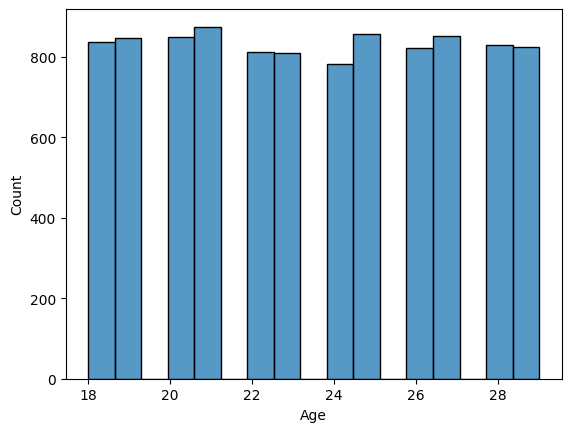

In [ ]:
import seaborn as sns
sns.histplot(df['Age'])

### Check unique values

In [ ]:
import pandas as pd

# Buat list untuk simpan data kolom dan nilai uniknya
data = []

for col in df.columns:
    unique_vals = df[col].unique()
    # Gabungkan nilai unik jadi string, supaya bisa ditampilkan dalam 1 cell
    unique_str = ', '.join(map(str, unique_vals))
    data.append({'Column': col, 'Unique_Values': unique_str})

# Buat DataFrame dari list tersebut
unique_df = pd.DataFrame(data)
unique_df

,Column,Unique_Values
0,Student_ID,"S00001, S00002, S00003, S00004, S00005, S00006..."
1,Age,"18, 29, 20, 23, 19, 28, 27, 22, 25, 24, 26, 21"
2,Gender,"Female, Male, Other"
3,Study_Hours_per_Week,"48, 30, 47, 13, 24, 26, 49, 14, 45, 35, 40, 44..."
4,Preferred_Learning_Style,"Kinesthetic, Reading/Writing, Auditory, Visual"
5,Online_Courses_Completed,"14, 20, 11, 0, 19, 5, 13, 16, 7, 18, 4, 17, 9,..."
6,Participation_in_Discussions,"Yes, No"
7,Assignment_Completion_Rate (%),"100, 71, 60, 63, 59, 91, 88, 52, 74, 77, 67, 8..."
8,Exam_Score (%),"69, 40, 43, 70, 63, 54, 44, 56, 78, 55, 73, 60..."
9,Attendance_Rate (%),"66, 57, 79, 60, 93, 80, 76, 70, 100, 74, 51, 5..."


## Cleaning Data

### Cek null

In [ ]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Study_Hours_per_Week,0
Preferred_Learning_Style,0
Online_Courses_Completed,0
Participation_in_Discussions,0
Assignment_Completion_Rate (%),0
Exam_Score (%),0
Attendance_Rate (%),0


### Duplikasi data

In [ ]:
df.duplicated().sum()

np.int64(0)

### Membersihkan Nilai Kategorikal yang Tidak Diinginkan

In [ ]:
# Menghapus baris dengan Gender 'Other'
print("Nilai unik di Gender sebelum:", df['Gender'].unique())
df = df[df['Gender'] != 'Other']
print("Nilai unik di Gender sesudah:", df['Gender'].unique())

# Menghapus kolom ‘Student_ID’ dari dataframe df.
df.drop('Student_ID', axis=1, inplace=True)


Nilai unik di Gender sebelum: ['Female' 'Male' 'Other']
Nilai unik di Gender sesudah: ['Female' 'Male']


<ipython-input-11-1821587877>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Student_ID', axis=1, inplace=True)


## Exploratory Data Analysis (EDA)

### Sebaran value Label (Final_Grade)

<ipython-input-12-1381906912>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Final_Grade', data=df, palette='flare')


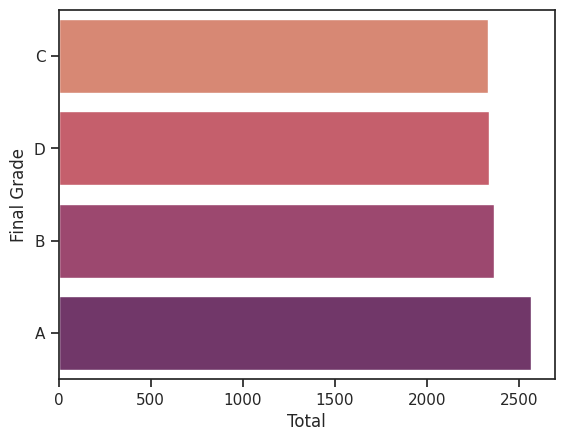

In [ ]:
import matplotlib.pyplot as plt
sns.set_theme(style='ticks')
sns.countplot(y='Final_Grade', data=df, palette='flare')
plt.ylabel("Final Grade")
plt.xlabel('Total')
plt.show()

### Sebaran Gender

<ipython-input-13-1288273434>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='rocket')


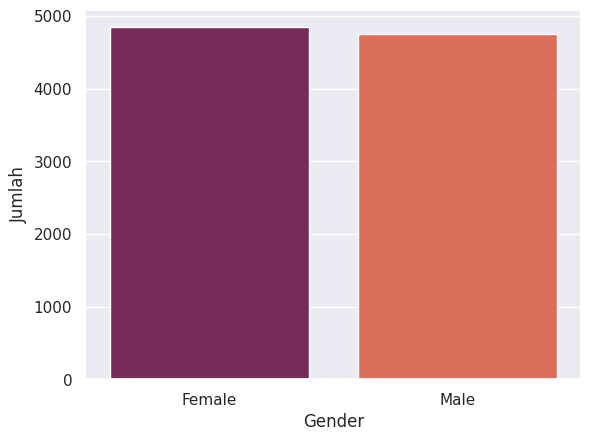

In [ ]:
sns.set_theme(style='darkgrid')
sns.countplot(x='Gender', data=df, palette='rocket')
plt.ylabel("Jumlah")
plt.xlabel('Gender')
plt.show()

## Data Preparation

In [ ]:
# Membaca 5 data teratas sebelum di encode
df.head()

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Preferred_Learning_Style'] = label_encoder.fit_transform(df['Preferred_Learning_Style'])
df['Participation_in_Discussions'] = label_encoder.fit_transform(df['Participation_in_Discussions'])
df['Use_of_Educational_Tech'] = label_encoder.fit_transform(df['Use_of_Educational_Tech'])
df['Self_Reported_Stress_Level'] = label_encoder.fit_transform(df['Self_Reported_Stress_Level'])
df['Final_Grade'] = label_encoder.fit_transform(df['Final_Grade'])

<ipython-input-15-711657734>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder.fit_transform(df['Gender'])
<ipython-input-15-711657734>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Preferred_Learning_Style'] = label_encoder.fit_transform(df['Preferred_Learning_Style'])
<ipython-input-15-711657734>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [ ]:
# Membaca 5 data setelah di encode
df.head()

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,18,0,48,1,14,1,100,69,66,1,0,9,8,2
1,29,0,30,2,20,0,71,40,57,1,2,28,8,3
2,20,0,47,1,11,0,60,43,79,1,1,13,7,3
3,23,0,13,0,0,1,63,70,60,1,1,24,10,1
4,19,0,24,0,19,1,59,63,93,1,2,26,8,2


### Split the Data

In [ ]:
X = df.drop(columns = ['Final_Grade'])
y = df['Final_Grade']

print("X : ", X.shape)
print("y : ", y.shape)

X :  (9594, 13)
y :  (9594,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(f"x_train : {x_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_test : {y_test.shape}")

x_train : (7675, 13)
y_train : (7675,)
x_test : (1919, 13)
y_test : (1919,)


In [ ]:
# Menampilkan data latih yang telah ditentukan pada proses sebelumnya
x_train

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
4877,18,1,23,0,1,1,69,66,50,1,2,3,7
3185,18,1,23,0,3,0,58,88,57,1,2,4,5
3672,29,1,11,3,13,1,78,90,85,1,2,11,8
3535,18,1,19,1,20,0,95,98,62,1,2,20,9
6924,29,1,18,3,8,1,58,78,50,1,2,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,18,0,33,3,14,1,88,67,59,1,1,29,9
5405,26,1,25,3,8,0,62,61,69,0,1,5,7
5615,22,0,20,1,8,1,89,78,83,1,2,8,9
902,25,1,5,3,14,1,66,79,96,1,2,9,7


In [ ]:
# Menampilkan data uji yang telah ditentukan pada proses sebelumnya
x_test

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
9472,29,1,20,0,7,1,73,62,88,1,1,30,10
7688,23,1,21,3,4,0,53,68,92,1,2,3,9
7551,28,0,30,3,1,1,72,73,85,0,0,0,5
8913,29,0,29,1,18,1,55,44,75,1,0,8,5
6871,27,0,26,0,4,1,91,75,55,1,2,17,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9359,23,0,22,3,11,1,98,96,94,1,0,0,4
1284,19,1,30,3,12,1,77,44,54,1,0,3,5
2868,19,0,14,2,8,1,95,58,83,1,2,25,5
3935,27,0,8,2,3,1,93,51,100,1,0,6,4


## Modeling

## Desain Algoritma K-Nearest Neighbors (KNN)

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report

class KNearestNeighbors:
    def __init__(self, k=9):
        self.k = k

    def euclidean_distance(self, point1, point2):
        """Menghitung jarak euclidean antara dua titik"""
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def fit(self, X, y):
        """Menyimpan data training"""
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        """Melakukan prediksi untuk dataset X"""
        X_test = np.array(X)
        predictions = []

        for test_point in X_test:
            # Hitung jarak dari titik test ke semua titik training
            distances = []
            for i, train_point in enumerate(self.X_train):
                distance = self.euclidean_distance(test_point, train_point)
                distances.append((distance, self.y_train[i]))

            # Urutkan berdasarkan jarak dan ambil k tetangga terdekat
            distances.sort(key=lambda x: x[0])
            k_nearest = distances[:self.k]

            # Ambil label dari k tetangga terdekat
            k_nearest_labels = [label for _, label in k_nearest]

            # Voting untuk menentukan prediksi (majority vote)
            most_common = Counter(k_nearest_labels).most_common(1)
            prediction = most_common[0][0]
            predictions.append(prediction)

        return np.array(predictions)

    def predict_single(self, test_point):
        """Melakukan prediksi untuk satu titik data"""
        test_point = np.array(test_point)
        distances = []

        for i, train_point in enumerate(self.X_train):
            distance = self.euclidean_distance(test_point, train_point)
            distances.append((distance, self.y_train[i]))

        # Urutkan berdasarkan jarak dan ambil k tetangga terdekat
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]

        # Mengambil label dari k tetangga terdekat
        k_nearest_labels = [label for _, label in k_nearest]

        # Voting untuk menentukan prediksi
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

print("=== KNN Implementation ===")

# Inisialisasi KNN manual dengan k=9
knn_manual = KNearestNeighbors(k=9)
print(" Inisialisasi KNN dengan k=9")
# Training model
knn_manual.fit(x_train, y_train)
print("\n Training KNN berhasil")

=== KNN Implementation ===
 Inisialisasi KNN dengan k=9

 Training KNN berhasil


## Evaluasi Data Train dan Data Test

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Simpan label encoder khusus untuk Final_Grade
final_grade_encoder = LabelEncoder()

# Fit encoder dengan data Final_Grade yang asli (sebelum di-encode)
# Asumsikan kita punya data asli Final_Grade
original_final_grades = ['A', 'B', 'C', 'D']
final_grade_encoder.fit(original_final_grades)

# ===== FUNGSI UNTUK MENGUBAH KEMBALI KE LABEL ASLI =====
def decode_predictions(encoded_predictions, encoder):
    return encoder.inverse_transform(encoded_predictions)

def decode_labels(encoded_labels, encoder):
    return encoder.inverse_transform(encoded_labels)

# ===== 1. EVALUASI TRAINING DATA =====
print("\n" + "="*50)
print("1. EVALUASI TRAINING DATA")
print("="*50)

# Prediksi pada data training
y_pred_train_encoded = knn_manual.predict(x_train)

# Decode hasil prediksi dan label asli
y_train_decoded = decode_labels(y_train, final_grade_encoder)
y_pred_train_decoded = decode_predictions(y_pred_train_encoded, final_grade_encoder)

# Akurasi training
train_accuracy = accuracy_score(y_train_decoded, y_pred_train_decoded)
print(f"\nAkurasi Training: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

# Classification report training dengan label asli
print("\nClassification Report - Training Data:")
print(classification_report(y_train_decoded, y_pred_train_decoded))

# ===== 2. EVALUASI TEST DATA =====
print("\n" + "="*50)
print("2. EVALUASI TEST DATA")
print("="*50)

# Prediksi pada data test
y_pred_test_encoded = knn_manual.predict(x_test)

# Decode hasil prediksi dan label asli
y_test_decoded = decode_labels(y_test, final_grade_encoder)
y_pred_test_decoded = decode_predictions(y_pred_test_encoded, final_grade_encoder)

# Akurasi test
test_accuracy = accuracy_score(y_test_decoded, y_pred_test_decoded)
print(f"\nAkurasi Test: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Classification report test dengan label asli
print("\nClassification Report - Test Data:")
print(classification_report(y_test_decoded, y_pred_test_decoded))

# ===== RINGKASAN EVALUASI =====
print("\n" + "="*50)
print("RINGKASAN EVALUASI KNN MANUAL")
print("="*50)
print(f"Akurasi Training: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Akurasi Test:     {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Selisih (Overfitting): {(train_accuracy - test_accuracy):.4f} ({(train_accuracy - test_accuracy)*100:.2f}%)")

if train_accuracy - test_accuracy > 0.05:
    print("Model mungkin mengalami overfitting (selisih > 5%)")
elif train_accuracy - test_accuracy < 0:
    print("Model underfitting atau ada masalah dengan data")
else:
    print("Model memiliki performa yang baik (tidak overfitting)")


1. EVALUASI TRAINING DATA

Akurasi Training: 0.9472 (94.72%)

Classification Report - Training Data:
              precision    recall  f1-score   support

           A       0.96      0.97      0.97      2050
           B       0.93      0.93      0.93      1904
           C       0.93      0.92      0.93      1839
           D       0.96      0.96      0.96      1882

    accuracy                           0.95      7675
   macro avg       0.95      0.95      0.95      7675
weighted avg       0.95      0.95      0.95      7675


2. EVALUASI TEST DATA

Akurasi Test: 0.9109 (91.09%)

Classification Report - Test Data:
              precision    recall  f1-score   support

           A       0.95      0.94      0.94       514
           B       0.86      0.88      0.87       461
           C       0.89      0.88      0.88       490
           D       0.94      0.95      0.94       454

    accuracy                           0.91      1919
   macro avg       0.91      0.91      0.91    

## Pengujian Data Tunggal

In [ ]:
testing = {'Age': [19],
        'Gender': [1],
        'Study_Hours_per_Week': [20],
        'Preferred_Learning_Style': [0],
        'Online_Courses_Completed': [7],
        'Participation_in_Discussions': [1],
        'Assignment_Completion_Rate (%)': [73],
        'Exam_Score (%)': [62],
        'Attendance_Rate (%)': [88],
        'Use_of_Educational_Tech': [1],
        'Self_Reported_Stress_Level': [1],
        'Time_Spent_on_Social_Media (hours/week)': [30],
        'Sleep_Hours_per_Night': [10]}

testing = pd.DataFrame(testing)
testing
# Prediksi Uji Data Tunggal
print("\n=== Prediksi Manual Satu Data Mahasiswa ===")
prediction_encoded = knn_manual.predict_single(testing.iloc[0])
print(f"Prediksi Encoded: {prediction_encoded}")
prediction_grade = final_grade_encoder.inverse_transform([prediction_encoded])[0]
print(f"Data point: {testing.values}")
print(f"Grade Mahasiswa Baru: {prediction_grade}")


=== Prediksi Manual Satu Data Mahasiswa ===
Prediksi Encoded: 2
Data point: [[19  1 20  0  7  1 73 62 88  1  1 30 10]]
Grade Mahasiswa Baru: C


## Model Evaluation

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold
import pandas as pd

# Simpan label encoder khusus untuk Final_Grade
final_grade_encoder = LabelEncoder()
# Fit encoder dengan data Final_Grade yang asli (sebelum di-encode)
original_final_grades = ['A', 'B', 'C', 'D']
final_grade_encoder.fit(original_final_grades)

# ===== FUNGSI UNTUK MENGUBAH KEMBALI KE LABEL ASLI =====
def decode_predictions(encoded_predictions, encoder):
    return encoder.inverse_transform(encoded_predictions)

def decode_labels(encoded_labels, encoder):
    return encoder.inverse_transform(encoded_labels)

# ===== FUNGSI K-FOLD CROSS-VALIDATION =====
def kfold_cross_validation(model, X, y, k=5, random_state=42):

    # Inisialisasi KFold
    kfold = KFold(n_splits=k, shuffle=True, random_state=random_state)

    # List untuk menyimpan hasil setiap fold
    fold_accuracies = []
    fold_reports = []
    fold_predictions = []
    fold_actual = []

    print(f"\n{'='*60}")
    print(f"K-FOLD CROSS-VALIDATION (k = {k})")
    print(f"{'='*60}")

    # Iterasi untuk setiap fold
    for fold_idx, (train_idx, test_idx) in enumerate(kfold.split(X), 1):
        print(f"\n--- FOLD {fold_idx} ---")

        # Split data berdasarkan indeks fold
        X_train_fold = X.iloc[train_idx]
        X_test_fold = X.iloc[test_idx]
        y_train_fold = y.iloc[train_idx]
        y_test_fold = y.iloc[test_idx]

        # Train model pada fold ini
        model.fit(X_train_fold, y_train_fold)

        # Prediksi pada test fold
        y_pred_fold = model.predict(X_test_fold)

        # Decode predictions dan actual labels
        y_test_decoded = decode_labels(y_test_fold, final_grade_encoder)
        y_pred_decoded = decode_predictions(y_pred_fold, final_grade_encoder)

        # Hitung akurasi fold ini
        fold_accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
        fold_accuracies.append(fold_accuracy)

        # Simpan hasil untuk analisis lebih lanjut
        fold_predictions.extend(y_pred_decoded)
        fold_actual.extend(y_test_decoded)

        print(f"Ukuran Training Set: {len(X_train_fold)}")
        print(f"Ukuran Test Set: {len(X_test_fold)}")
        print(f"Akurasi Fold {fold_idx}: {fold_accuracy:.4f} ({fold_accuracy*100:.2f}%)")

        # Classification report untuk fold ini
        fold_report = classification_report(y_test_decoded, y_pred_decoded,
                                          output_dict=True, zero_division=0)
        fold_reports.append(fold_report)

        # Tampilkan distribusi kelas untuk fold ini
        unique_actual, counts_actual = np.unique(y_test_decoded, return_counts=True)
        unique_pred, counts_pred = np.unique(y_pred_decoded, return_counts=True)

        print(f"Distribusi Aktual: {dict(zip(unique_actual, counts_actual))}")
        print(f"Distribusi Prediksi: {dict(zip(unique_pred, counts_pred))}")

    # ===== ANALISIS HASIL K-FOLD =====
    print(f"\n{'='*60}")
    print("HASIL K-FOLD CROSS-VALIDATION")
    print(f"{'='*60}")

    # Statistik akurasi
    mean_accuracy = np.mean(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    min_accuracy = np.min(fold_accuracies)
    max_accuracy = np.max(fold_accuracies)

    print(f"\nSTATISTIK AKURASI:")
    print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Min Accuracy:  {min_accuracy:.4f} ({min_accuracy*100:.2f}%)")
    print(f"Max Accuracy:  {max_accuracy:.4f} ({max_accuracy*100:.2f}%)")
    print(f"Range:         {max_accuracy - min_accuracy:.4f}")

    # Confidence Interval (95%)
    confidence_interval = 1.96 * std_accuracy / np.sqrt(k)
    print(f"95% Confidence Interval: {mean_accuracy:.4f} ± {confidence_interval:.4f}")
    print(f"CI Range: [{mean_accuracy - confidence_interval:.4f}, {mean_accuracy + confidence_interval:.4f}]")

    # Akurasi per fold
    print(f"\nAKURASI PER FOLD:")
    for i, acc in enumerate(fold_accuracies, 1):
        print(f"Fold {i}: {acc:.4f} ({acc*100:.2f}%)")

    # Classification Report keseluruhan
    print(f"\nCLASSIFICATION REPORT KESELURUHAN:")
    print(classification_report(fold_actual, fold_predictions))

    # Analisis konsistensi model
    print(f"\nANALISIS KONSISTENSI MODEL:")
    if std_accuracy < 0.05:
        print("✓ Model sangat konsisten (standar deviasi < 0.05)")
    elif std_accuracy < 0.10:
        print("✓ Model cukup konsisten (standar deviasi < 0.10)")
    else:
        print("⚠ Model kurang konsisten (standar deviasi ≥ 0.10)")

    # Kembalikan dictionary dengan hasil lengkap
    results = {
        'fold_accuracies': fold_accuracies,
        'mean_accuracy': mean_accuracy,
        'std_accuracy': std_accuracy,
        'min_accuracy': min_accuracy,
        'max_accuracy': max_accuracy,
        'confidence_interval': confidence_interval,
        'fold_reports': fold_reports,
        'all_predictions': fold_predictions,
        'all_actual': fold_actual
    }

    return results

In [ ]:
results = kfold_cross_validation(model=knn_manual, X=X, y=y, k=5)


K-FOLD CROSS-VALIDATION (k = 5)

--- FOLD 1 ---
Ukuran Training Set: 7675
Ukuran Test Set: 1919
Akurasi Fold 1: 0.9119 (91.19%)
Distribusi Aktual: {np.str_('A'): np.int64(514), np.str_('B'): np.int64(461), np.str_('C'): np.int64(490), np.str_('D'): np.int64(454)}
Distribusi Prediksi: {np.str_('A'): np.int64(506), np.str_('B'): np.int64(469), np.str_('C'): np.int64(479), np.str_('D'): np.int64(465)}

--- FOLD 2 ---
Ukuran Training Set: 7675
Ukuran Test Set: 1919
Akurasi Fold 2: 0.9276 (92.76%)
Distribusi Aktual: {np.str_('A'): np.int64(511), np.str_('B'): np.int64(482), np.str_('C'): np.int64(449), np.str_('D'): np.int64(477)}
Distribusi Prediksi: {np.str_('A'): np.int64(519), np.str_('B'): np.int64(475), np.str_('C'): np.int64(460), np.str_('D'): np.int64(465)}

--- FOLD 3 ---
Ukuran Training Set: 7675
Ukuran Test Set: 1919
Akurasi Fold 3: 0.9234 (92.34%)
Distribusi Aktual: {np.str_('A'): np.int64(538), np.str_('B'): np.int64(453), np.str_('C'): np.int64(475), np.str_('D'): np.int64(4

### Visualisasi Konsistensi Model

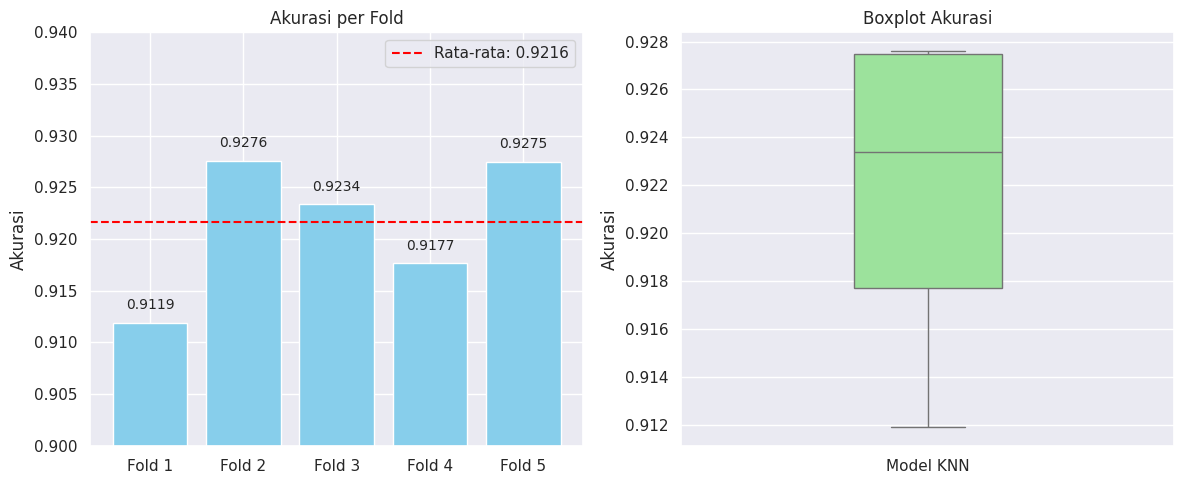

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data akurasi per fold
accuracies = [0.9119, 0.9276, 0.9234, 0.9177, 0.9275]
folds = [f'Fold {i+1}' for i in range(len(accuracies))]
mean_acc = sum(accuracies) / len(accuracies)

plt.figure(figsize=(12, 5))

# Bar Plot
plt.subplot(1, 2, 1)
bars = plt.bar(folds, accuracies, color='skyblue')
plt.axhline(mean_acc, color='red', linestyle='--', label=f'Rata-rata: {mean_acc:.4f}')
plt.ylim(0.90, 0.94)
plt.title('Akurasi per Fold')
plt.ylabel('Akurasi')
plt.legend()

# Annotasi nilai akurasi
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001, f"{acc:.4f}",
             ha='center', va='bottom', fontsize=10)

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(data=accuracies, width=0.3, color='lightgreen')
plt.title('Boxplot Akurasi')
plt.ylabel('Akurasi')
plt.xticks([0], ['Model KNN'])

plt.tight_layout()
plt.show()